In [35]:
import json
import matplotlib.pyplot as plt
import numpy as np
import statistics
from matplotlib.ticker import LogLocator, LogFormatter

In [2]:
typeIndexResultFile = "./data/type_index_result.json"
shapeIndexResultFile = "./data/shape_index_result.json"

In [3]:
typeIndexResult = None
shapeIndexResult = None

In [4]:
with open(typeIndexResultFile, 'rb') as rf:
    typeIndexResult = json.load(rf)
    
with open(shapeIndexResultFile, 'rb') as rf:
    shapeIndexResult = json.load(rf)

In [5]:
executionTimeTypeIndex = {}
executionTimeShapeIndex = {}
elementWithNotIdenticalResult = []

In [6]:
for queryName, versionData in typeIndexResult["data"].items():
    executionTimeTypeIndex[queryName] = {}
    executionTimeShapeIndex[queryName] = {}
    for version, repetitionData in versionData.items():
        executionTimeTypeIndex[queryName][version] = []
        executionTimeShapeIndex[queryName][version] = []
        for i, repetition in enumerate(repetitionData):
            if(type(repetition)!=str):
                setResultTypeIndex = {e for l in repetition['results'] for e in l}
                setResultShapeIndex = {e for l in shapeIndexResult["data"][queryName][version][i]['results'] for e in l}
                
                executionTimeTypeIndex[queryName][version].append(repetition['execution_time'])
                executionTimeShapeIndex[queryName][version].append(shapeIndexResult["data"][queryName][version][i]['execution_time'])
                
                # Validate that the results are the same
                if setResultTypeIndex!= setResultShapeIndex :
                    elementWithNotIdenticalResult.append([queryName, version, i])
            else:
                executionTimeTypeIndex[queryName][version].append(0)
                    
for queryName, versionData in shapeIndexResult["data"].items():
    executionTimeShapeIndex[queryName] = {}
    for version, repetitionData in versionData.items():
        executionTimeShapeIndex[queryName][version] = []
        for i, repetition in enumerate(repetitionData):
            if(type(repetition)!=str):
                executionTimeShapeIndex[queryName][version].append(shapeIndexResult["data"][queryName][version][i]['execution_time'])
            else:
                executionTimeShapeIndex[queryName][version].append(0)
               


## Plot one

In [7]:
indexes = np.linspace(0, 0.25, 5)
yaxisIndexes = np.arange(0, 2500, 500)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f355c813a10>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f355c8603b0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f355c860c50>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f355c861490>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f355c811c70>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f355c8124b0>}

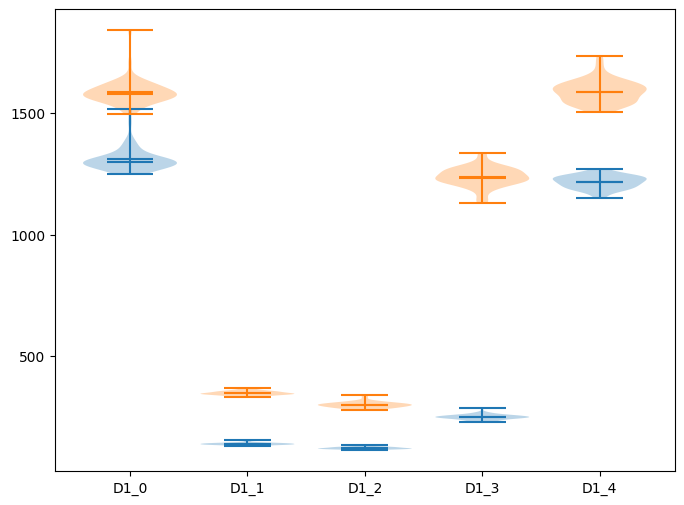

In [8]:
queryName ="queries/parsed/interactive-discover-1.sparql.json"


allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]

width = 0.05 

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)
ax.set_xticks(indexes)
ax.set_xticklabels(["D1_{}".format(i) for i,v in enumerate(indexes)])
ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f355c880cb0>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f355a738860>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f355a73a840>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f355a73ade0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f355a73ad50>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f355a73baa0>}

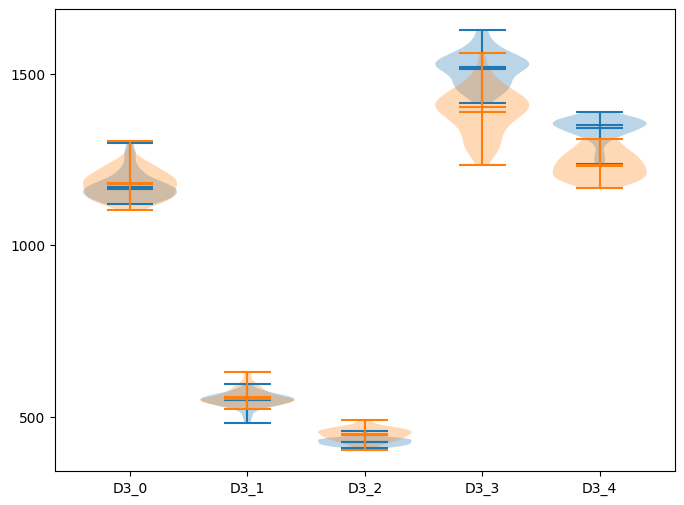

In [9]:
queryName ="queries/parsed/interactive-discover-3.sparql.json"

allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]

width = 0.05 

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)
ax.set_xticks(indexes)
ax.set_xticklabels(["D3_{}".format(i) for i,v in enumerate(indexes)])
ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f355a7bbc20>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f355a70ebd0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f355a7bb830>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f355a7ba2d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f355a7ba780>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f355a7bacc0>}

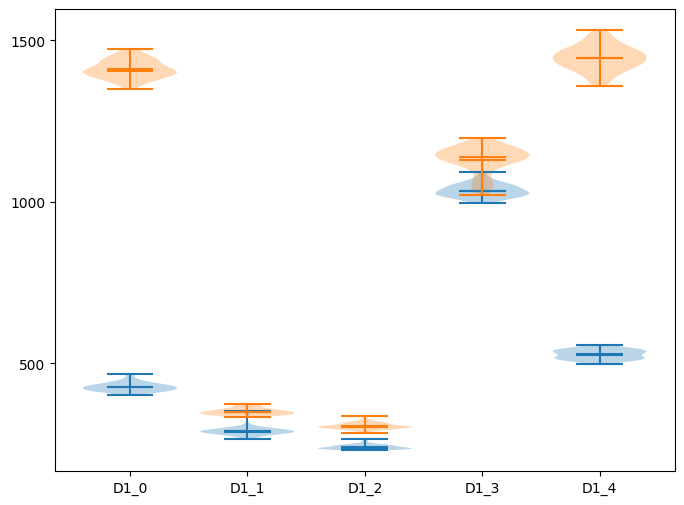

In [10]:
queryName ="queries/parsed/interactive-discover-4.sparql.json"

allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]

width = 0.05 

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)
ax.set_xticks(indexes)
ax.set_xticklabels(["D1_{}".format(i) for i,v in enumerate(indexes)])
ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f355a616540>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f355a6148f0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f355a667aa0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f355a666bd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f355a75dfd0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f355a614bf0>}

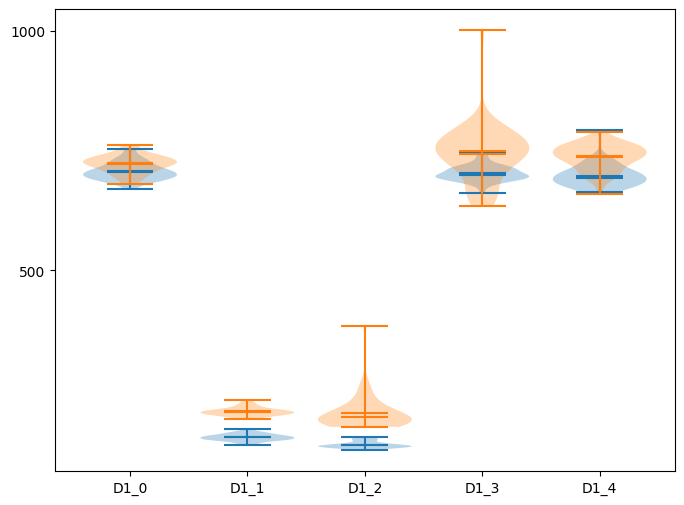

In [11]:
queryName ="queries/parsed/interactive-discover-5.sparql.json"

allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]

width = 0.05 

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)
ax.set_xticks(indexes)
ax.set_xticklabels(["D1_{}".format(i) for i,v in enumerate(indexes)])
ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f355a503b90>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f355c8610a0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f355c861010>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f355a69e750>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f355c861b50>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f355a6d3ef0>}

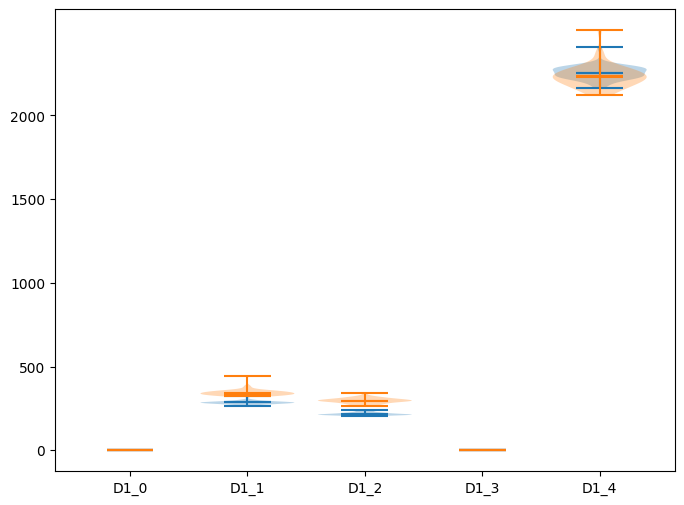

In [12]:
queryName ="queries/parsed/interactive-discover-6.sparql.json"

allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]

width = 0.05 

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)
ax.set_xticks(indexes)
ax.set_xticklabels(["D1_{}".format(i) for i,v in enumerate(indexes)])
ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f355a593c20>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f355a555ac0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f355a5c2b70>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f355a533020>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f355a5922a0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f355c988aa0>}

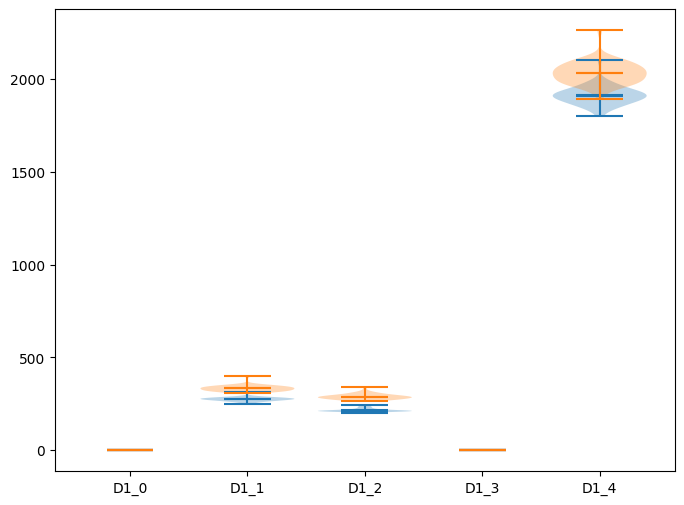

In [13]:
queryName ="queries/parsed/interactive-discover-7.sparql.json"

allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]

width = 0.05 

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)
ax.set_xticks(indexes)
ax.set_xticklabels(["D1_{}".format(i) for i,v in enumerate(indexes)])
ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f355a43be30>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f355a43bd10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f355a46d5e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f355a46dee0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f355a665ee0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f355a46ebd0>}

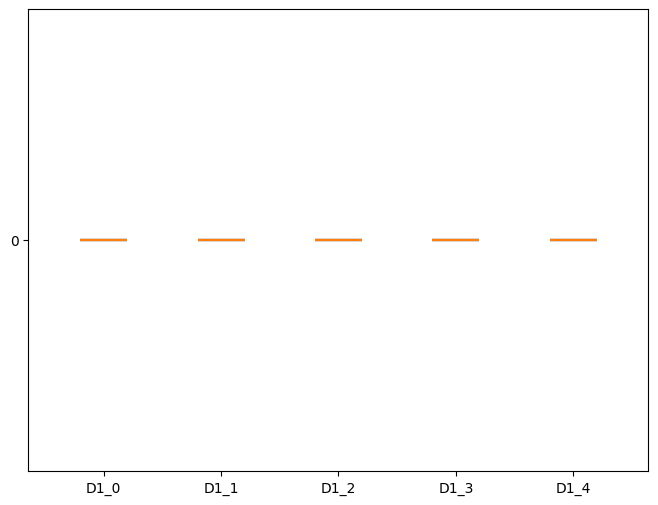

In [14]:
queryName ="queries/parsed/interactive-complex-8.sparql.json"

allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]

width = 0.05 

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)
ax.set_xticks(indexes)
ax.set_xticklabels(["D1_{}".format(i) for i,v in enumerate(indexes)])
ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f355a665a00>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f355a4cf440>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f355a2fef30>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f355a70f500>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f355c8cfb30>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f355a32c110>}

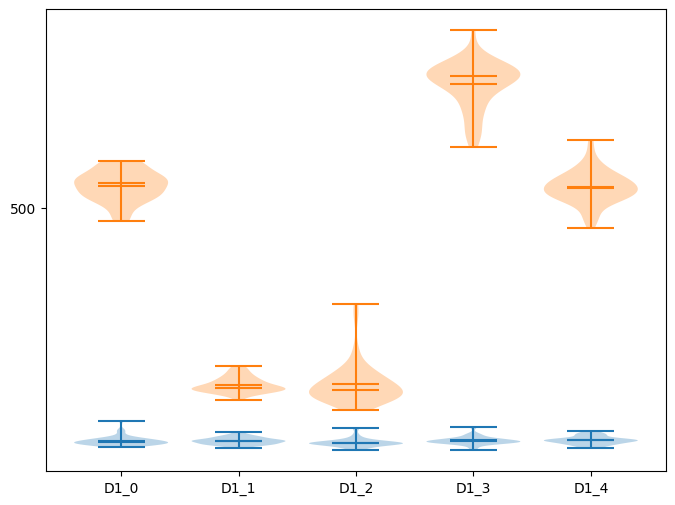

In [15]:
queryName ="queries/parsed/interactive-short-1.sparql.json"

allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]

width = 0.05 

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)
ax.set_xticks(indexes)
ax.set_xticklabels(["D1_{}".format(i) for i,v in enumerate(indexes)])
ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f355a32d520>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f355a4cde80>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f355a3bc2f0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f355a3bc7d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f355a3bce00>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f355a3bd220>}

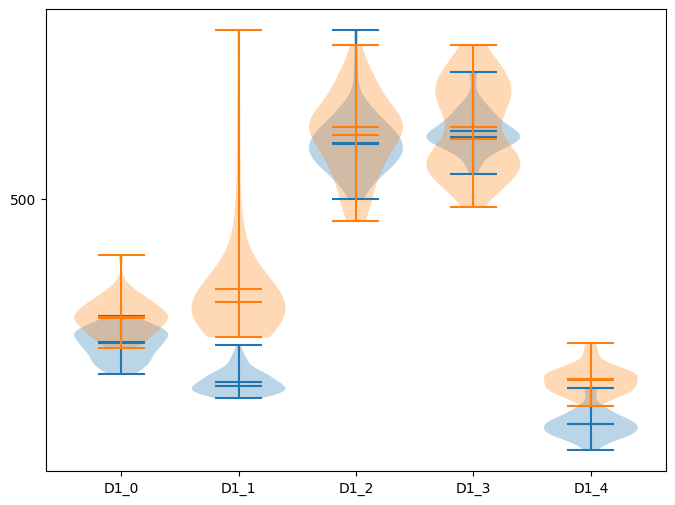

In [16]:
queryName ="queries/parsed/interactive-short-5.sparql.json"

allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]

width = 0.05 

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)
ax.set_xticks(indexes)
ax.set_xticklabels(["D1_{}".format(i) for i,v in enumerate(indexes)])
ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)

## Tryout

In [17]:
def colorViolon(part, color):  
    for pc in part['bodies']:
        pc.set_color(color)
        pc.set_edgecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(0.75)
    part['cmeans'].set_color('black')
    part['cmins'].set_color('black')
    part['cmaxes'].set_color('black')
    part['cbars'].set_color('black')
    part['cmedians'].set_color('black')

[0.   1.25 2.5  3.75 5.  ]


Text(0, 0.5, 'Execution time')

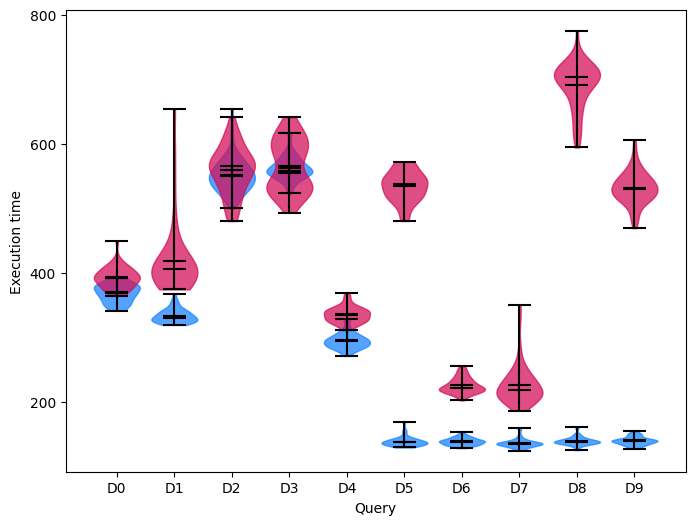

In [18]:
queryNameShort5 ="queries/parsed/interactive-short-5.sparql.json"

allDataShapeIndexShort5 = [data for label,data in executionTimeShapeIndex[queryNameShort5].items()]
allDataTypeIndexShort5  = [data for label,data in executionTimeTypeIndex[queryNameShort5].items()]


queryNameShort1 ="queries/parsed/interactive-short-1.sparql.json"

allDataShapeIndexShort1 = [data for label,data in executionTimeShapeIndex[queryNameShort1].items()]
allDataTypeIndexShort1 = [data for label,data in executionTimeTypeIndex[queryNameShort1].items()]


width = 1
tempindexes = np.linspace(0, 5, 5)
print(tempindexes)
yaxisIndexes = np.arange(0, 2500, 200)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)

xticks = [1.25*i for i in range(0,10)]
ax.set_xticks(xticks)
ax.set_xticklabels(["D{}".format(i,i) for i,v in enumerate(xticks)])



partsShapeIndex = ax.violinplot(allDataShapeIndexShort5, tempindexes, widths=width, showmeans=True, showmedians=True)
partsTypeIndex = ax.violinplot(allDataTypeIndexShort5, tempindexes, widths=width, showmeans=True, showmedians=True)
colorViolon(partsShapeIndex,'#1A85FF')
colorViolon(partsTypeIndex,'#D41159')

partsShapeIndex = ax.violinplot(allDataShapeIndexShort1, tempindexes+tempindexes[-1]+1.25, widths=width, showmeans=True, showmedians=True)
partsTypeIndex = ax.violinplot(allDataTypeIndexShort1, tempindexes+tempindexes[-1]+1.25, widths=width, showmeans=True, showmedians=True)
colorViolon(partsShapeIndex,'#1A85FF')
colorViolon(partsTypeIndex,'#D41159')

ax.set_xlabel("Query")
ax.set_ylabel("Execution time")

## Plot execution time

In [19]:
def appendPlot(ax, query, indexes):
    
    allDataShapeIndex = [data for label,data in executionTimeShapeIndex[query].items()]
    allDataTypeIndex  = [data for label,data in executionTimeTypeIndex[query].items()]
    
    partsShapeIndex = ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
    partsTypeIndex = ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)
    
    colorViolon(partsShapeIndex,'#1A85FF')
    colorViolon(partsTypeIndex,'#D41159')

In [38]:
queries = [
    ["queries/parsed/interactive-short-1.sparql.json", "S1V"],
    ["queries/parsed/interactive-short-5.sparql.json", "S5V"],
    
    ["queries/parsed/interactive-discover-1.sparql.json", "D1V"],
    ["queries/parsed/interactive-discover-3.sparql.json", "D3V"],
    ["queries/parsed/interactive-discover-4.sparql.json", "D4V"],
    ["queries/parsed/interactive-discover-5.sparql.json", "D5V"],
    ["queries/parsed/interactive-discover-7.sparql.json", "D7V"],

    #["queries/parsed/interactive-complex-8.sparql.json", "C8V"],
]

queriesBetterPerformance = [
    ["queries/parsed/interactive-short-1.sparql.json", "S1V"],
    #["queries/parsed/interactive-short-5.sparql.json", "S5V"],
    
    ["queries/parsed/interactive-discover-1.sparql.json", "D1V"],
    #["queries/parsed/interactive-discover-3.sparql.json", "D3V"],
    ["queries/parsed/interactive-discover-4.sparql.json", "D4V"],
    ["queries/parsed/interactive-discover-5.sparql.json", "D5V"],
    ["queries/parsed/interactive-discover-7.sparql.json", "D7V"],

    #["queries/parsed/interactive-complex-8.sparql.json", "C8V"],
]

True

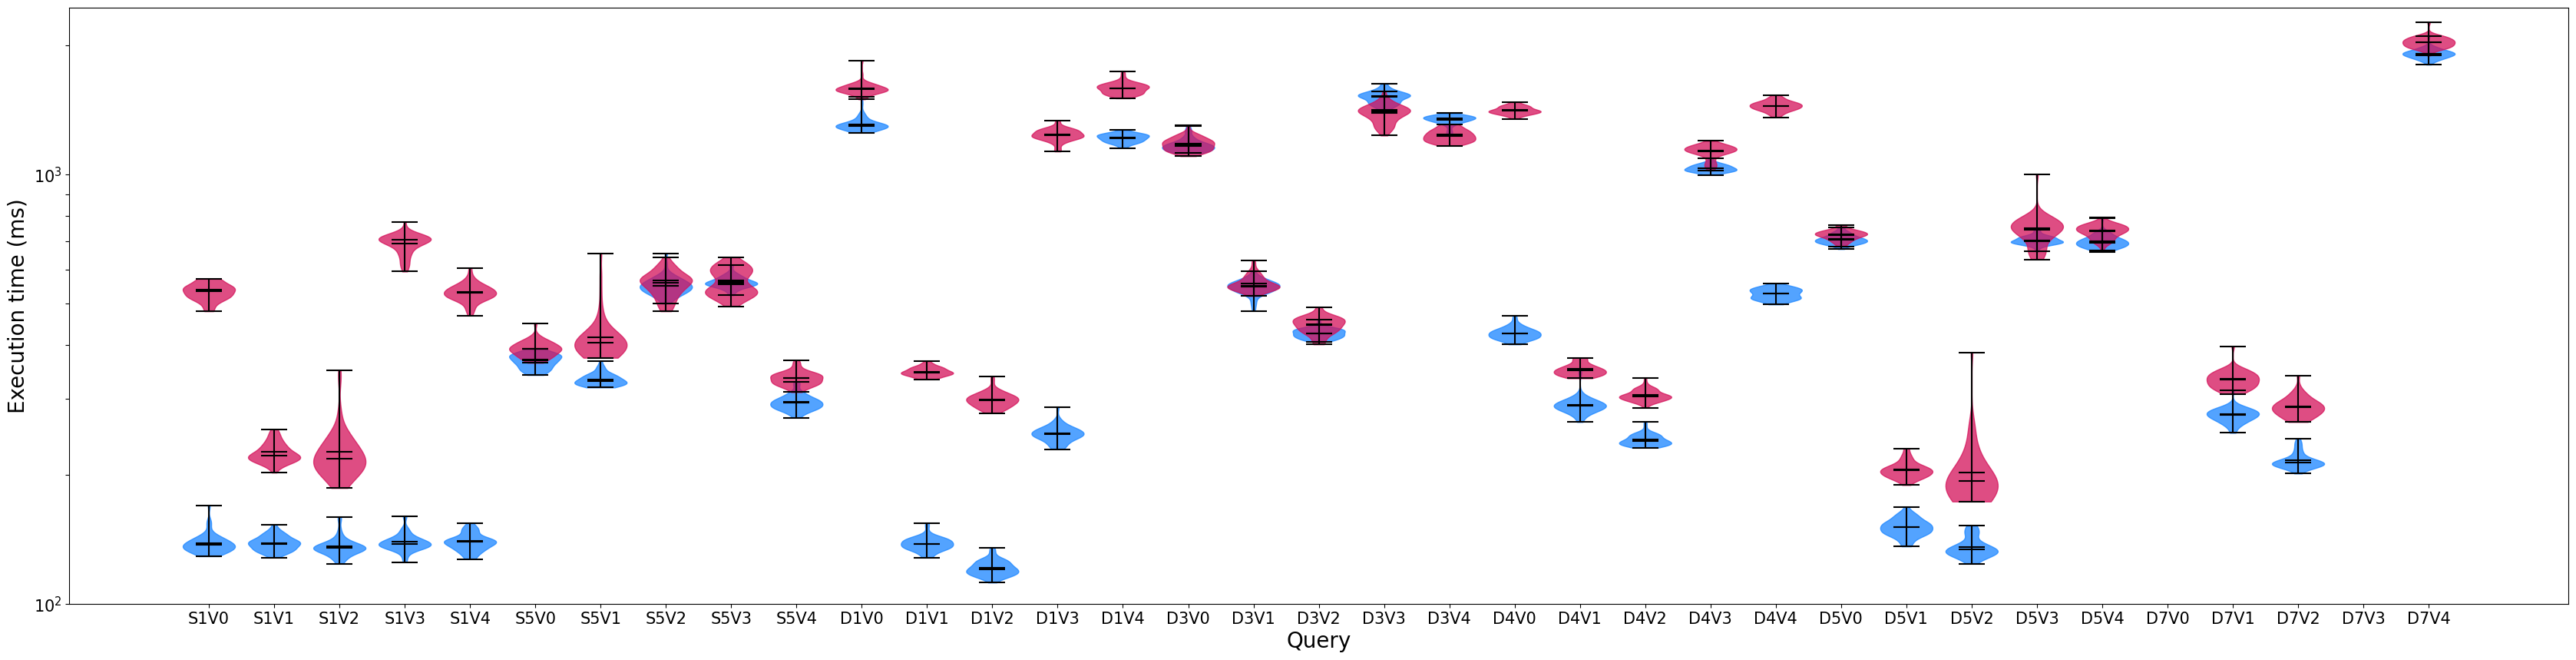

In [47]:
yaxisIndexes = np.arange(50, 2500, 200)
fig, ax = plt.subplots()
ratio = 6/25
fig.set_size_inches(42, 42*ratio)
ax.set_yticks(yaxisIndexes)
ax.set_ylim(bottom=100)
ax.set_yscale('log', base=10)

xticks = [1.25*i for i in range(0,5*7)]
ax.set_xticks(xticks)
xtickLabel = []
for _,label in queries:
    xtickLabel+= ["{}{}".format(label, i) for i in range(0,5)]
ax.set_xticklabels(xtickLabel, fontsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=[1, 2, 3, 4, 5, 6, 7, 8, 9], numticks=10))
ax.yaxis.set_minor_formatter(LogFormatter(base=10, labelOnlyBase=False))

ax.set_xlabel("Query", fontsize=20)
ax.set_ylabel("Execution time (ms)", fontsize=20)

indexes =  np.linspace(0, 5, 5)
initialIndex = np.linspace(0, 5, 5)
for query,_ in queries:
    appendPlot(ax, query, indexes)
    indexes = np.arange(indexes[-1]+1.25, indexes[-1]+6.25+0.1, 1.25)
True

In [ ]:
yaxisIndexes = np.arange(50, 2500, 200)
fig, ax = plt.subplots()
ratio = 6/25
fig.set_size_inches(42, 42*ratio)
ax.set_yticks(yaxisIndexes)
ax.set_ylim(bottom=100)
ax.set_yscale('log', base=10)

xticks = [1.25*i for i in range(0,5*7)]
ax.set_xticks(xticks)
xtickLabel = []
for _,label in queries:
    xtickLabel+= ["{}{}".format(label, i) for i in range(0,5)]
ax.set_xticklabels(xtickLabel, fontsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=[1, 2, 3, 4, 5, 6, 7, 8, 9], numticks=10))
ax.yaxis.set_minor_formatter(LogFormatter(base=10, labelOnlyBase=False))

ax.set_xlabel("Query", fontsize=20)
ax.set_ylabel("Execution time (ms)", fontsize=20)

indexes =  np.linspace(0, 5, 5)
initialIndex = np.linspace(0, 5, 5)
for query,_ in queries:
    appendPlot(ax, query, indexes)
    indexes = np.arange(indexes[-1]+1.25, indexes[-1]+6.25+0.1, 1.25)
True